# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import array
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Description of NoteBook

### Authors of this notebook
- Sidhantha Poddar-17BCE2044
- Bais Atharva Sanjay-17BCE0931
- Achyut Tripathi-17BCE0954
- Moturu Niharika-17BCE0951
- Kausthub Kesavadas-17BCE2144

This project uses six machine learning algorithms. They are Logistic Regression, Multinomial Naive Bayes, K-Nearest neighbors , Decision Tree, Adaboost and Random Forest.

# Data analytics and vizualization

In [7]:
sns.set()

In [18]:
#importing dataset
df = pd.read_csv('data/train.csv')
df2 = pd.read_csv('data/test.csv')

In [4]:
#printing head of dataset
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,6,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,6,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,6,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,6,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,6,0


In [5]:
#some info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  int64  
 2   service            175341 non-null  int64  
 3   state              175341 non-null  int64  
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

>From the graph below we can infer that there is a relationship threshold between attacks and dur/sbytes values

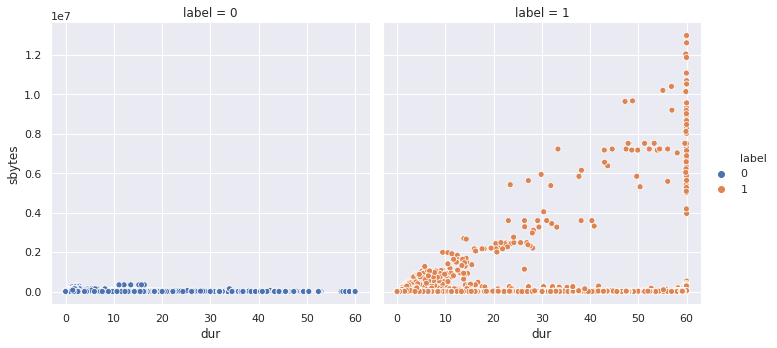

In [20]:
sns.relplot(x="dur", y="sbytes",col="label", hue="label",data=df);

>From the graph below we can infer that there is a relationship threshold between attacks and dur/dbytes values

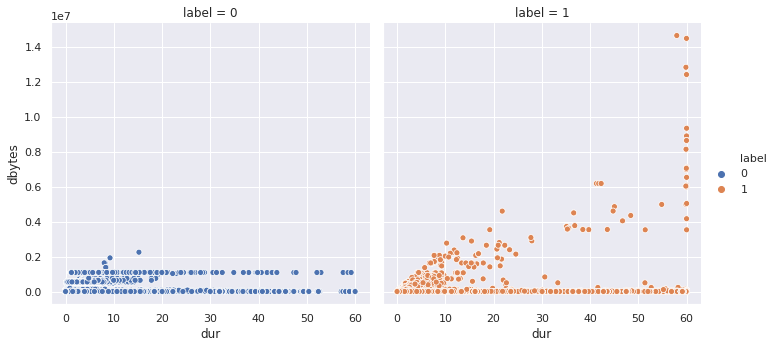

In [26]:
plt.subplots(figsize=(20, 10))
sns.relplot(x="dur", y="dbytes",col="label", hue="label",data=df);

>From the graph below we can infer that there is a relationship threshold between attacks and sbytes/dbytes values

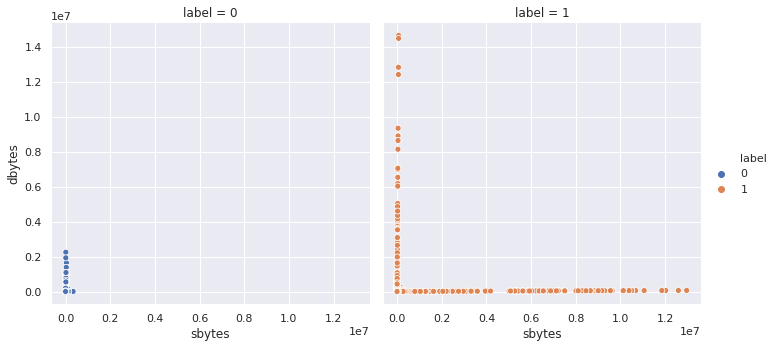

In [59]:
sns.relplot(x="sbytes", y="dbytes",col="label", hue="label",data=df);

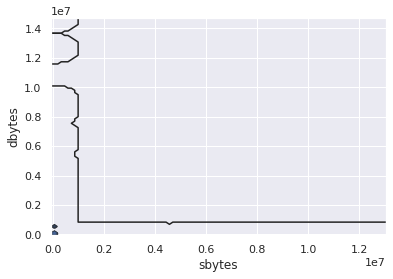

In [56]:
sns.kdeplot(df.sbytes, df.dbytes)

<Figure size 1440x720 with 0 Axes>

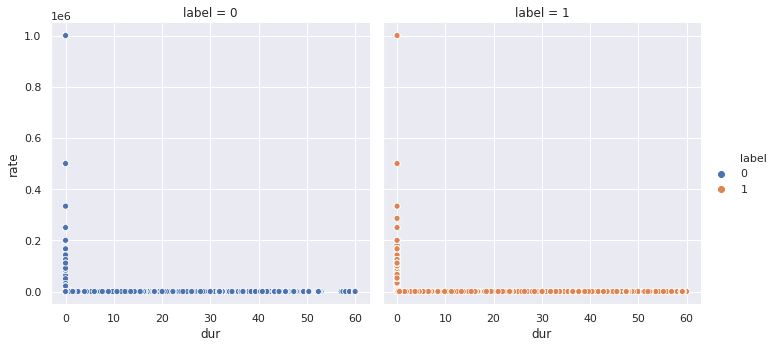

In [52]:
sns.relplot(x="dur", y="rate",col="label", hue="label",data=df);

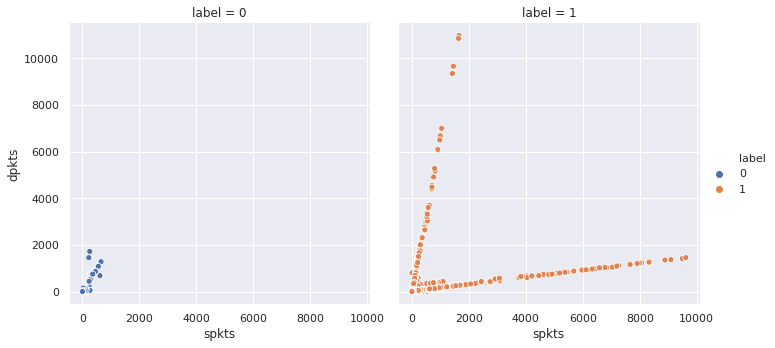

In [71]:
sns.relplot(x="spkts", y="dpkts",col="label", hue="label",data=df);

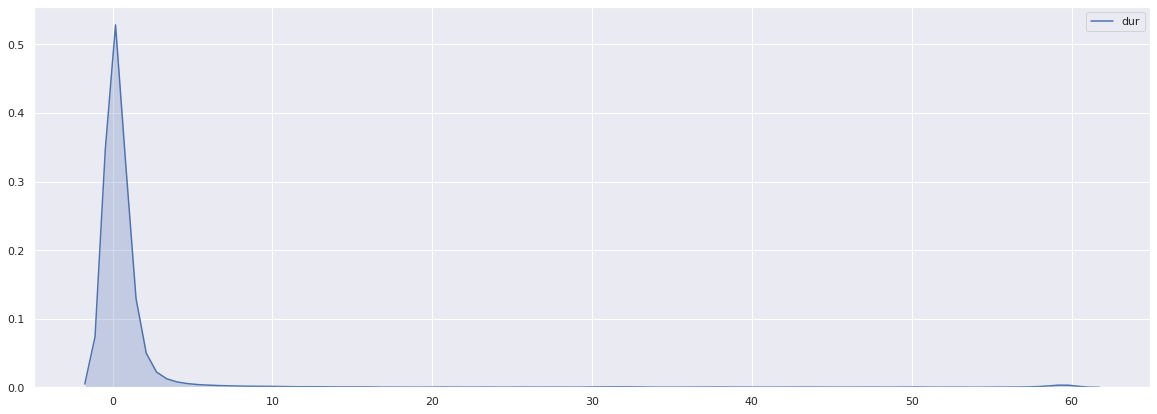

In [8]:
%matplotlib inline
plt.subplots(figsize=(20, 7))
sns.kdeplot(df["dur"], shade=True)

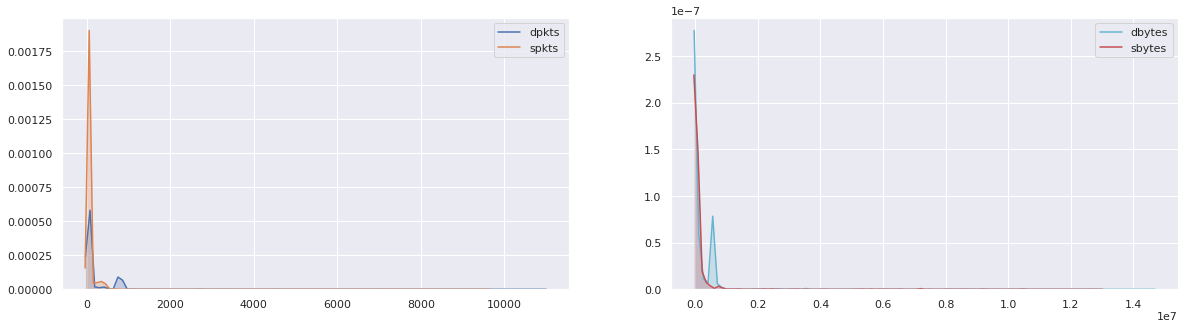

In [9]:
plt.subplots(figsize=(20, 5))

plt.subplot(1,2,1)
sns.kdeplot(df["dpkts"], shade=True)
sns.kdeplot(df["spkts"], shade=True)

plt.subplot(1,2,2)
sns.kdeplot(df["dbytes"], shade=True, color ='c')
sns.kdeplot(df["sbytes"], shade=True, color = 'r')

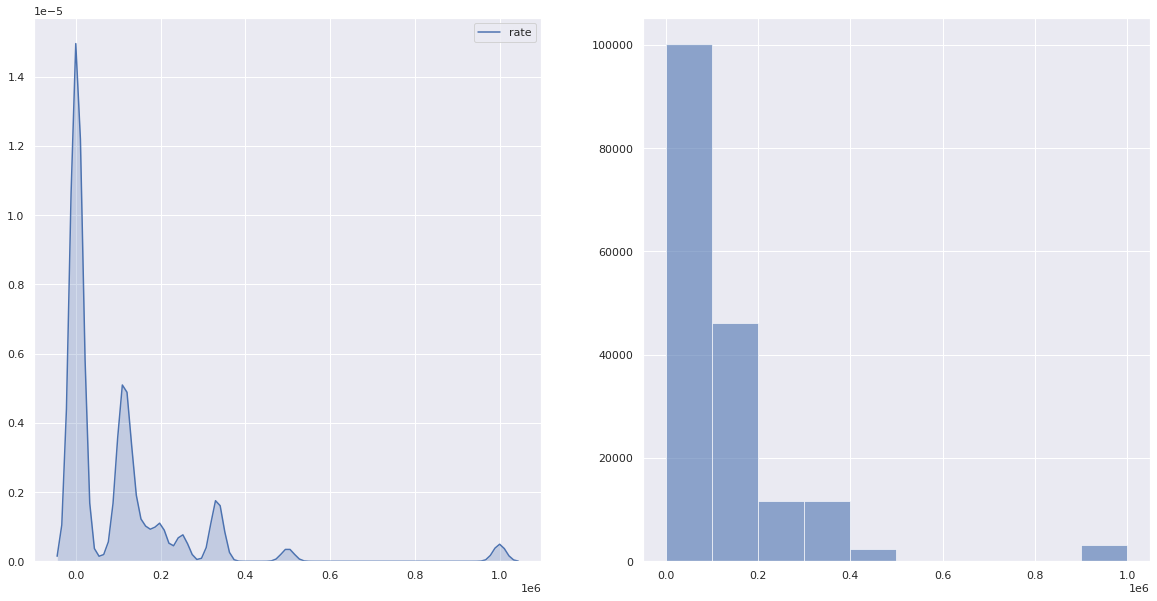

In [49]:
plt.subplots(figsize=(20, 10))
plt.subplot(1,2,1)
sns.kdeplot(df["rate"], shade=True)
plt.subplot(1,2,2)
x=plt.hist(df["rate"],alpha=0.6)

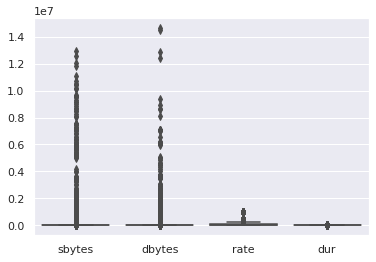

In [47]:
sns.boxplot(data=df[["sbytes","dbytes","rate","dur"]])

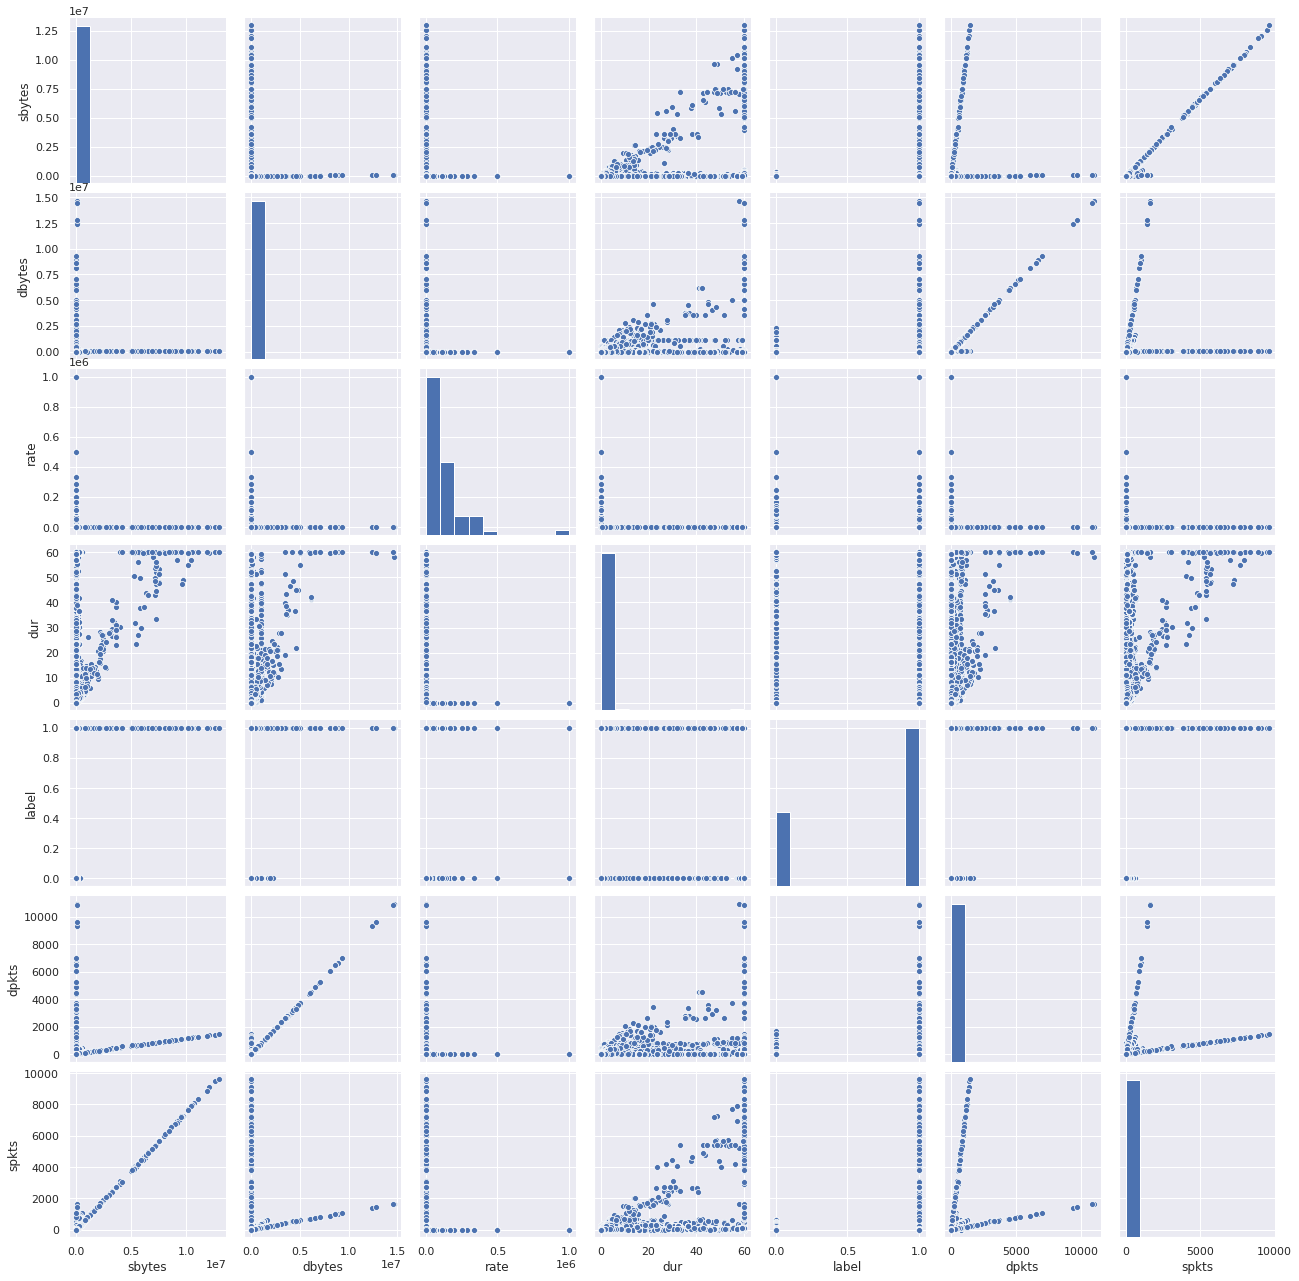

In [74]:
sns.pairplot(df[["sbytes","dbytes","rate","dur","label","dpkts","spkts"]])
plt.show()

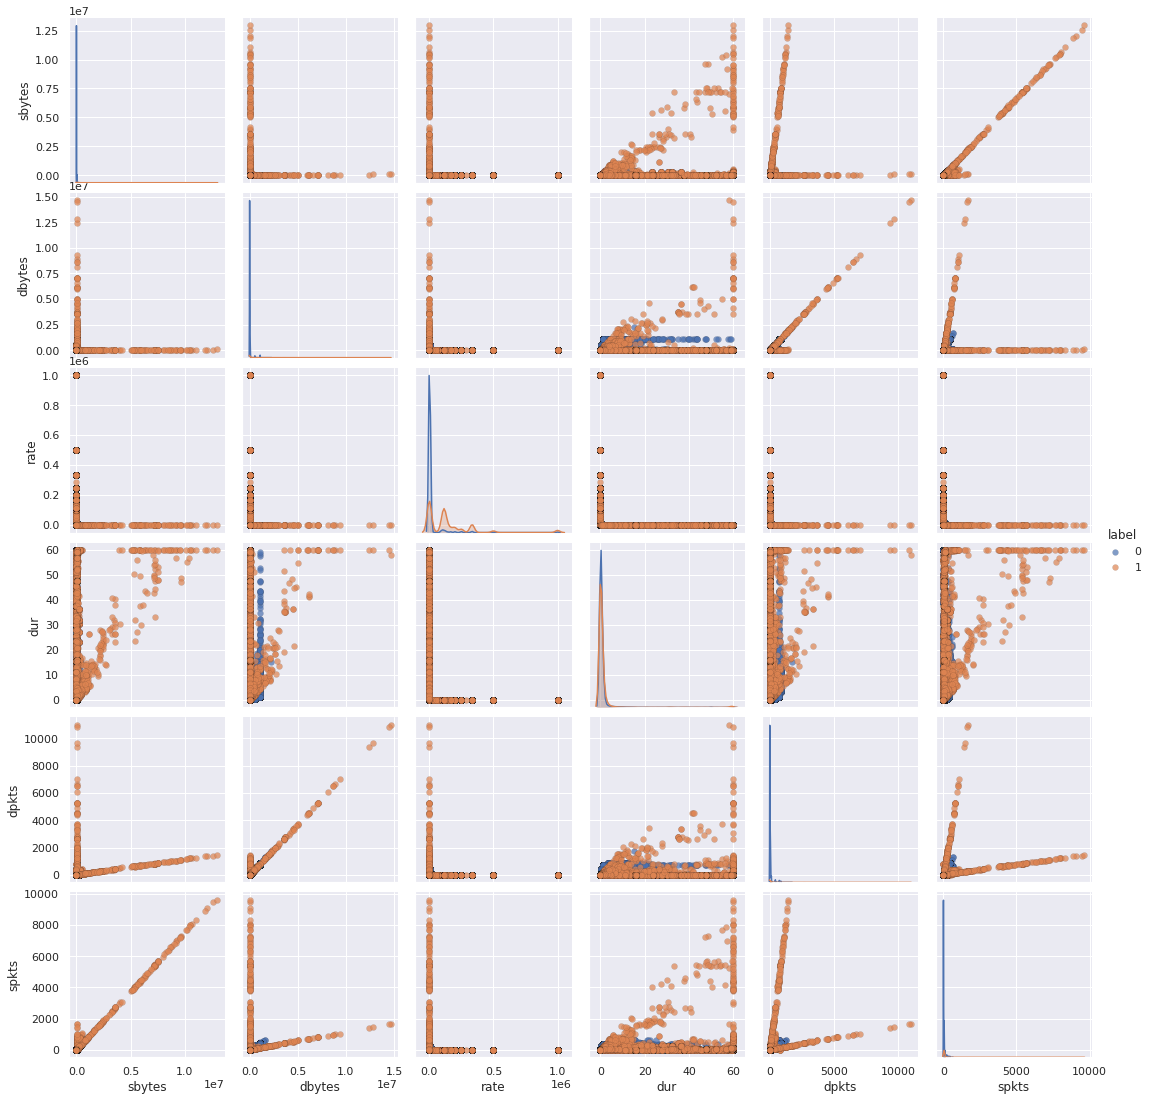

In [10]:
g=sns.pairplot(data=df[["sbytes","dbytes",
                      "rate","dur",
                      "dpkts","spkts","label"]], 
             hue="label",
             plot_kws=dict(alpha=.7, edgecolor=".1", linewidth=.1) )


## Analysis on results of data visualization 

1. False Positve (of attack) is the major cause of the error
2. From visualization we can see that attack have threshold values while normal use dont
3. Many Non Attacks can be seperated by using fast algorithm like DT or regressing
4. Ensemble model can be created using a simple fast model and deeplearning models for two level prevention

# Feature Selection and Data Cleaning

1    119341
0     56000
Name: label, dtype: int64

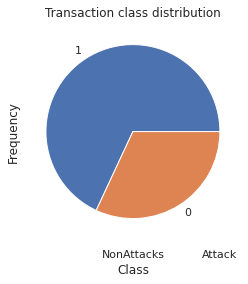

In [16]:
Attack= df[df['label'] == 1]
NonAttack = df[df['label'] == 0]
classes = pd.value_counts(df['label'], sort = True)
output=df['label']
df=df.iloc[:,:-1]

labels = ['NonAttacks','Attack']
classes.plot(kind = 'pie', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
output.value_counts()

In [13]:
#One Hot Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from numpy import array

le_service = LabelEncoder()
le_proto = LabelEncoder()
le_state= LabelEncoder()
df['service_encoded'] = le_service.fit_transform(df.service)
df['proto_encoded'] = le_proto.fit_transform(df.proto)
df['state_encoded'] = le_state.fit_transform(df.state)


service_ = OneHotEncoder()
proto_ = OneHotEncoder()
state_ = OneHotEncoder()
X = service_.fit_transform(df.service_encoded.values.reshape(-1,1)).toarray()
Xm = proto_.fit_transform(df.proto_encoded.values.reshape(-1,1)).toarray()
Xmm = state_.fit_transform(df.state_encoded.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["service_"+str(int(i)) for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
dfOneHot = pd.DataFrame(Xm, columns = ["proto_"+str(int(i)) for i in range(Xm.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
dfOneHot = pd.DataFrame(Xmm, columns = ["state_"+str(int(i)) for i in range(Xmm.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)

df.drop(columns=['proto','service','state'], inplace = True )
df.shape
df2.drop(columns='attack_cat', inplace = True )

In [14]:
df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto_132,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,...,0.000570,0.075008,0.000068,0.443849,0.469229,0.000006,0.011355,0.000473,0.000006,0.000006
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,...,0.023875,0.263405,0.008272,0.496839,0.499054,0.002388,0.105954,0.021752,0.002388,0.002388
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# remove string cols
df.drop(columns='attack_cat', inplace = True )

bestfeatuers=SelectKBest(score_func=chi2,k=10)
inp=df.iloc[:,0:198]
fit=bestfeatuers.fit(inp,output)
dfscores=pd.DataFrame(fit.scores_)
dfcol=pd.DataFrame(inp.columns)
featurescore=pd.concat([dfcol,dfscores],axis=1)
featurescore.columns=['feature','score']
k=featurescore['feature']
t=featurescore.nlargest(10,'score')
li=list(t['feature'])
print("Top 100 features:")
print("\n")
for x in li:
    print(x,end=" , ")

Top 100 features:


stcpb , dtcpb , sload , dload , rate , dbytes , sinpkt , sbytes , response_body_len , djit , 

In [22]:
x_train=df[li]
y_train=output
x_test=df2[li]
y_test = df2['label']
accTest={}
accTrain={}
predTest={}
predTrain={}

# Model Creation and Prediction

## Decision tree
Decision trees are created by recursive apportioning. A univariate split is chosen for the foundation of the tree as indicated by some measure, and the procedure rehashes recursively. This procedure known as pruning, which diminishes the tree size, is performed once a full tree has been constructed. The most well known delegate of choice trees is C4.5.A bootstrap test of the first information subsets is used to develop different choice trees (Forest). Each tree in the forest gives a choice about the class of the new article that should be grouped. The class which acquires the most decisions in favor of the item is chosen by the forest.

Train Accuracy ::  0.9890727211547784
Test Accuracy  ::  0.8648642083272604
              precision    recall  f1-score   support

           0       0.93      0.75      0.83     37000
           1       0.83      0.95      0.89     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.86     82332
weighted avg       0.87      0.86      0.86     82332

1.1983942985534668


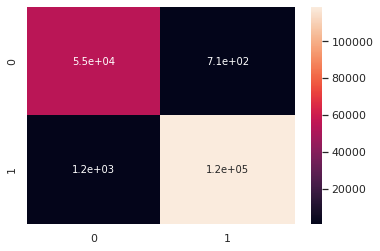

In [29]:
start = time.time()
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(x_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, preds))

#val.append(dec_tree_f)

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
end = time.time()
print(end - start)

accTest["Decision Tree"]=accuracy_score(y_test, predTest["Decision Tree"])
accTrain["Decision Tree"]=accuracy_score(y_train, predTrain["Decision Tree"])
predTest["Decision Tree"] = clf.predict(x_test)
predTrain["Decision Tree"] = clf.predict(x_train)
cf_matrix = confusion_matrix(predTrain["Decision Tree"], y_train)
sns.heatmap(cf_matrix, annot=True)

## RandomForest
The Random Forest is a group learning technique for unpruned characterization, relapse, or different undertakings, that comprises of building various choice trees. A bootstrap test of the first information subsets is used to build different choice trees (Forest). Each tree in the forest gives a choice about the class of the new article that should be arranged. The class which acquires the most decisions in favor of the item is chosen by the forest.

Train Accuracy ::  0.9671554285649107
Test Accuracy  ::  0.8648642083272604
              precision    recall  f1-score   support

           0       0.93      0.75      0.83     37000
           1       0.83      0.95      0.89     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.86     82332
weighted avg       0.87      0.86      0.86     82332

0.5476417541503906


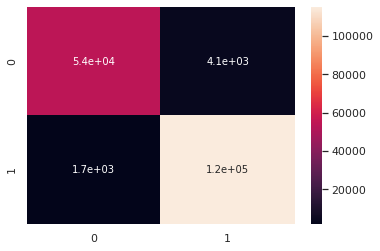

In [30]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()

clf = RandomForestClassifier(n_estimators = 2,random_state=30)
clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(x_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
end = time.time()
print(end - start)

predTest["Random Forest"] = clf.predict(x_test)
predTrain["Random Forest"] = clf.predict(x_train)
accTest["Random Forest"]=accuracy_score(y_test, predTest["Random Forest"])
accTrain["Random Forest"]=accuracy_score(y_train, predTrain["Random Forest"])
cf_matrix = confusion_matrix(predTrain["Random Forest"], y_train)
sns.heatmap(cf_matrix, annot=True)

## NaiveBayes
The Naive Bayes calculation is a natural technique that utilizes Bayes rule to process the probabilities of each credit having a place with each class to make a forecast. It rearranges the estimation of probabilities by accepting that the traits are free, given the mark of every single other quality. Various examinations have demonstrated that Naive Bayes calculations were suddenly precise for grouping assignments, but just with little databases. For some bigger databases, the exactness of decision trees was superior to Naive Bayes.

Train Accuracy ::  0.7926383447111628
Test Accuracy  ::  0.7078171306417917
              precision    recall  f1-score   support

           0       0.74      0.54      0.62     37000
           1       0.69      0.85      0.76     45332

    accuracy                           0.71     82332
   macro avg       0.72      0.69      0.69     82332
weighted avg       0.71      0.71      0.70     82332

410.72349190711975


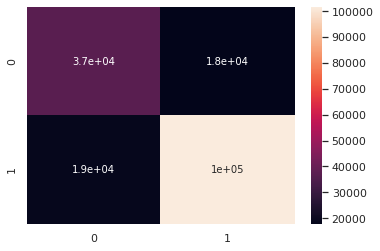

In [32]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
n = GaussianNB()

n.fit(x_train, y_train)
preds = n.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
print ("Train Accuracy :: ", accuracy_score(y_train, n.predict(x_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
end = time.time()
print(end - start)

predTest["Gaussian Naive Bayes"] = n.predict(x_test)
predTrain["Gaussian Naive Bayes"] = n.predict(x_train)
accTest["Gaussian Naive Bayes"]=accuracy_score(y_test, predTest["Gaussian Naive Bayes"])
accTrain["Gaussian Naive Bayes"]=accuracy_score(y_train, predTrain["Gaussian Naive Bayes"])
cf_matrix = confusion_matrix(predTrain["Gaussian Naive Bayes"], y_train)
sns.heatmap(cf_matrix, annot=True)

## Logistic Regression
Logistic Regression is a factual strategy for breaking down a dataset in which there are at least one autonomous factors that decide a result. The result is estimated with a dichotomous variable (where there are just two potential results). It is utilized to predict a binary outcome (1/0, Yes/No, True/False) given a lot of autonomous factors. To speak to the binary/categorical results, we utilize sham factors. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as dependent variable. In basic words, it predicts the likelihood of event of an occasion by fitting information to a logit work.

Train Accuracy ::  0.8508506282044701
Test Accuracy  ::  0.7057037360928922
              precision    recall  f1-score   support

           0       0.90      0.39      0.54     37000
           1       0.66      0.96      0.78     45332

    accuracy                           0.71     82332
   macro avg       0.78      0.68      0.66     82332
weighted avg       0.77      0.71      0.68     82332

557.4947443008423


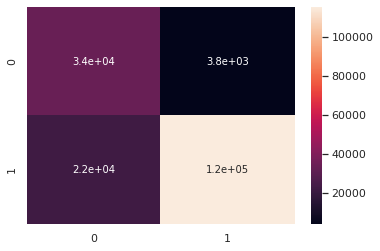

In [33]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial') 
LR.fit(x_train, y_train)
preds = LR.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
print ("Train Accuracy :: ", accuracy_score(y_train, LR.predict(x_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
end = time.time()
print(end - start)

predTest["Logistic Regression"] = LR.predict(x_test)
predTrain["Logistic Regression"] = LR.predict(x_train)
accTest["Logistic Regression"]=accuracy_score(y_test, predTest["Logistic Regression"])
accTrain["Logistic Regression"]=accuracy_score(y_train, predTrain["Logistic Regression"])
cf_matrix = confusion_matrix(predTrain["Logistic Regression"], y_train)
sns.heatmap(cf_matrix, annot=True)


## K Nearest Neighbour
K-closest neighbor calculation (k-NN) is a non-parametric technique utilized for characterization and relapse. In the two cases, the info comprises of the k nearest preparing models in the component space. k-NN is a kind of case-based learning, or lethargic realizing, where the capacity is just approximated locally and all calculation is conceded until work assessment. Both for order and relapse, a valuable strategy can be to allocate loads to the commitments of the neighbors, so that the nearest neighbors contribute more to the normal than the more inaccessible ones.

Train Accuracy ::  0.916094923606002
Test Accuracy  ::  0.7787494534324443
              precision    recall  f1-score   support

           0       0.90      0.57      0.70     37000
           1       0.73      0.95      0.82     45332

    accuracy                           0.78     82332
   macro avg       0.81      0.76      0.76     82332
weighted avg       0.81      0.78      0.77     82332

769.6019361019135


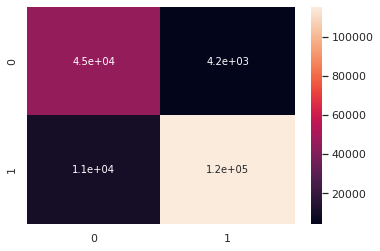

In [34]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
preds = KNN.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
print ("Train Accuracy :: ", accuracy_score(y_train, KNN.predict(x_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
end = time.time()
print(end - start)

predTest["KNN"] = KNN.predict(x_test)
predTrain["KNN"] = KNN.predict(x_train)
accTest["KNN"]=accuracy_score(y_test, predTest["KNN"])
accTrain["KNN"]=accuracy_score(y_train, predTrain["KNN"])
cf_matrix = confusion_matrix(predTrain["KNN"], y_train)
sns.heatmap(cf_matrix, annot=True)

## ADAboost

AdaBoost is one of the first boosting calculations to be adjusted in tackling rehearses. Adaboost causes you to join various "frail classifiers" into a solitary "solid classifier". The frail students in AdaBoost are choice trees with a solitary split, called choice stumps. AdaBoost works by putting more weight on it hard to arrange examples and less on those effectively taken care of well. AdaBoost calculations can be utilized for both arrangement and relapse issue.

Train Accuracy ::  0.8956661590842986
Test Accuracy  ::  0.7510081134917165
              precision    recall  f1-score   support

           0       0.93      0.48      0.64     37000
           1       0.70      0.97      0.81     45332

    accuracy                           0.75     82332
   macro avg       0.81      0.73      0.72     82332
weighted avg       0.80      0.75      0.73     82332

995.9182922840118


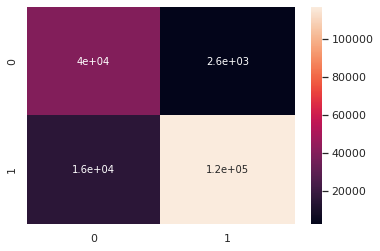

In [35]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()

ADA.fit(x_train, y_train)
preds = ADA.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
print ("Train Accuracy :: ", accuracy_score(y_train, ADA.predict(x_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, preds))

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
end = time.time()
print(end - start)

predTest["AdaBoostClassifier"] = ADA.predict(x_test)
predTrain["AdaBoostClassifier"] = ADA.predict(x_train)
accTest["AdaBoostClassifier"]=accuracy_score(y_test, predTest["AdaBoostClassifier"])
accTrain["AdaBoostClassifier"]=accuracy_score(y_train, predTrain["AdaBoostClassifier"])
cf_matrix = confusion_matrix(predTrain["AdaBoostClassifier"], y_train)
sns.heatmap(cf_matrix, annot=True)

## Artificial Neural Network

Neural networks help us cluster and classify. You can think of them as a clustering and classification layer on top of the data you store and manage. They help to group unlabeled data according to similarities among the example inputs, and they classify data when they have a labeled dataset to train on. (Neural networks can also extract features that are fed to other algorithms for clustering and classification; so you can think of deep neural networks as components of larger machine-learning applications involving algorithms for reinforcement learning, classification and regression).
All classification tasks depend upon labeled datasets; that is, humans must transfer their knowledge to the dataset in order for a neural network to learn the correlation between labels and data. This is known as supervised learning.

    • Detect faces, identify people in images, recognize facial expressions (angry, joyful)
    • Identify objects in images (stop signs, pedestrians, lane markers…)
    • Recognize gestures in video
    • Detect voices, identify speakers, transcribe speech to text, recognize sentiment in voices
    • Classify text as spam (in emails), or fraudulent (in insurance claims); recognize sentiment in text 
    
Any labels that humans can generate, any outcomes that you care about and which correlate to data, can be used to train a neural network.

Deep learning is the name we use for “stacked neural networks”; that is, networks composed of several layers. 

The layers are made of nodes. A node is just a place where computation happens, loosely patterned on a neuron in the human brain, which fires when it encounters sufficient stimuli. A node combines input from the data with a set of coefficients, or weights, that either amplify or dampen that input, thereby assigning significance to inputs with regard to the task the algorithm is trying to learn; e.g. which input is most helpful is classifying data without error? These input-weight products are summed and then the sum is passed through a node’s so-called activation function, to determine whether and to what extent that signal should progress further through the network to affect the ultimate outcome, say, an act of classification. If the signals passes through, the neuron has been “activated.”

In [47]:
x_train

,stcpb,dtcpb,sload,dload,rate,dbytes,sinpkt,sbytes,response_body_len,djit
0,621772692,2202533631,1.415894e+04,8495.365234,74.087490,172,24.295600,258,0,11.830604
1,1417884146,3077387971,8.395112e+03,503571.312500,78.473372,42014,49.915000,734,0,1387.778330
2,2116150707,2963114973,1.572272e+03,60929.230470,14.170161,13186,231.875571,364,0,11420.926230
3,1107119177,1047442890,2.740179e+03,3358.622070,13.677108,770,152.876547,628,0,4991.784669
4,2436137549,1977154190,8.561499e+03,3987.059814,33.373826,268,47.750333,534,0,115.807000
...,...,...,...,...,...,...,...,...,...,...
175336,0,0,5.066666e+07,0.000000,111111.107200,0,0.009000,114,0,0.000000
175337,3518776216,3453092386,8.826286e+03,4903.492188,33.612649,354,54.400111,620,0,120.177727
175338,0,0,5.066666e+07,0.000000,111111.107200,0,0.009000,114,0,0.000000
175339,0,0,5.066666e+07,0.000000,111111.107200,0,0.009000,114,0,0.000000


In [51]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(20,input_dim=10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(x_train,y_train,validation_split = 0.1, epochs=50, batch_size=64)

Train on 157806 samples, validate on 17535 samples
Epoch 1/50
157806/157806 [==============================] - 6s 35us/step - loss: 1357343.5117 - accuracy: 0.7725 - val_loss: 94002.5836 - val_accuracy: 0.9266
Epoch 2/50
157806/157806 [==============================] - 6s 40us/step - loss: 227046.0114 - accuracy: 0.7877 - val_loss: 243.4700 - val_accuracy: 0.9989
Epoch 3/50
157806/157806 [==============================] - 4s 28us/step - loss: 216799.3582 - accuracy: 0.7905 - val_loss: 231.8764 - val_accuracy: 0.9983
Epoch 4/50
157806/157806 [==============================] - 4s 28us/step - loss: 173487.1072 - accuracy: 0.7926 - val_loss: 1026.5814 - val_accuracy: 0.9949
Epoch 5/50
157806/157806 [==============================] - 4s 28us/step - loss: 157412.4637 - accuracy: 0.7933 - val_loss: 46448.6223 - val_accuracy: 0.9218
Epoch 6/50
157806/157806 [==============================] - 5s 33us/step - loss: 160664.5923 - accuracy: 0.7950 - val_loss: 155895.7325 - val_accuracy: 0.8709
Epoc

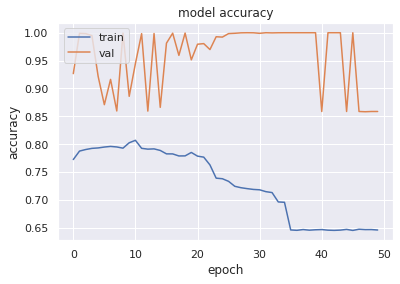

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

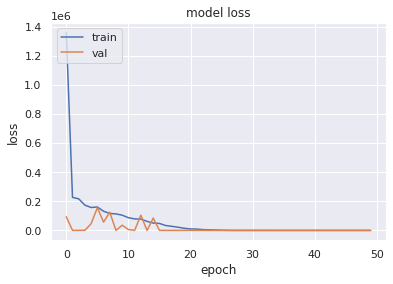

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

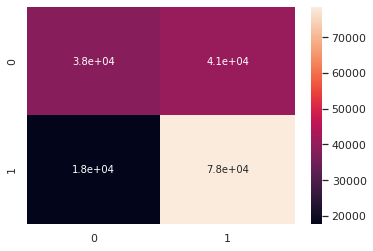

In [74]:
predTest["Artificial Neural Network"] = model.predict_classes(x_test).reshape(82332)
predTrain["Artificial Neural Network"] = model.predict_classes(x_train).reshape(175341)
accTest["Artificial Neural Network"]=accuracy_score(y_test, predTest["Artificial Neural Network"])
accTrain["Artificial Neural Network"]=accuracy_score(y_train, predTrain["Artificial Neural Network"])
cf_matrix = confusion_matrix(predTrain["Artificial Neural Network"], y_train)
sns.heatmap(cf_matrix, annot=True)

# Ensemble Stacking

In [81]:
n_train=pd.DataFrame(np.hstack([x_train.values,pd.DataFrame.from_dict(predTrain).values]))
n_test=pd.DataFrame(np.hstack([x_test.values,pd.DataFrame.from_dict(predTest).values]))

In [82]:
n_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,6.217727e+08,2.202534e+09,1.415894e+04,8495.365234,74.087490,172.0,24.295600,258.0,0.0,11.830604,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1.417884e+09,3.077388e+09,8.395112e+03,503571.312500,78.473372,42014.0,49.915000,734.0,0.0,1387.778330,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.116151e+09,2.963115e+09,1.572272e+03,60929.230470,14.170161,13186.0,231.875571,364.0,0.0,11420.926230,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.107119e+09,1.047443e+09,2.740179e+03,3358.622070,13.677108,770.0,152.876547,628.0,0.0,4991.784669,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,2.436138e+09,1.977154e+09,8.561499e+03,3987.059814,33.373826,268.0,47.750333,534.0,0.0,115.807000,0.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000000e+00,0.000000e+00,5.066666e+07,0.000000,111111.107200,0.0,0.009000,114.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
175337,3.518776e+09,3.453092e+09,8.826286e+03,4903.492188,33.612649,354.0,54.400111,620.0,0.0,120.177727,1.0,1.0,0.0,1.0,1.0,1.0,0.0
175338,0.000000e+00,0.000000e+00,5.066666e+07,0.000000,111111.107200,0.0,0.009000,114.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
175339,0.000000e+00,0.000000e+00,5.066666e+07,0.000000,111111.107200,0.0,0.009000,114.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [106]:
model= Sequential()
model.add(Dense(17,input_dim=17,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 17)                306       
_________________________________________________________________
dense_40 (Dense)             (None, 15)                270       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 16        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(n_train,y_train,validation_split = 0.1, epochs=50, batch_size=128)

Train on 157806 samples, validate on 17535 samples
Epoch 1/50
157806/157806 [==============================] - 2s 14us/step - loss: 1519272.4183 - accuracy: 0.7168 - val_loss: 1775.4721 - val_accuracy: 0.9944
Epoch 2/50
157806/157806 [==============================] - 2s 15us/step - loss: 378333.2700 - accuracy: 0.7660 - val_loss: 151.4455 - val_accuracy: 0.9979
Epoch 3/50
157806/157806 [==============================] - 2s 14us/step - loss: 383045.8060 - accuracy: 0.7723 - val_loss: 266808.7953 - val_accuracy: 0.8880
Epoch 4/50
157806/157806 [==============================] - 2s 14us/step - loss: 397046.5836 - accuracy: 0.7817 - val_loss: 73078.9054 - val_accuracy: 0.8799
Epoch 5/50
157806/157806 [==============================] - 2s 14us/step - loss: 381345.9650 - accuracy: 0.7862 - val_loss: 93.4020 - val_accuracy: 0.9990
Epoch 6/50
157806/157806 [==============================] - 2s 14us/step - loss: 358636.3586 - accuracy: 0.7944 - val_loss: 59567.4978 - val_accuracy: 0.1675
Epoch

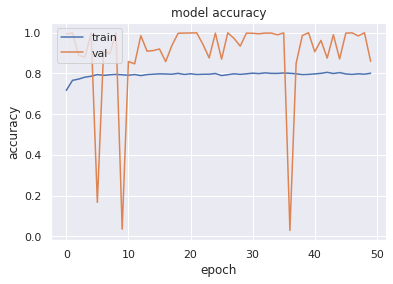

In [110]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

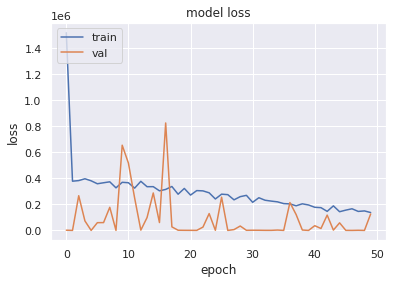

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

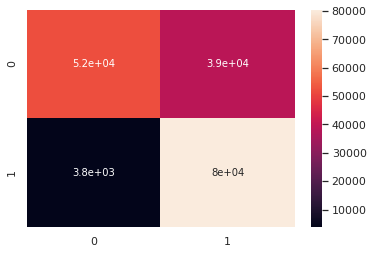

In [112]:
predTest["Ensemble Stacking"] = model.predict_classes(n_test).reshape(82332)
predTrain["Ensemble Stacking"] = model.predict_classes(n_train).reshape(175341)
accTest["Ensemble Stacking"]=accuracy_score(y_test, predTest["Ensemble Stacking"])
accTrain["Ensemble Stacking"]=accuracy_score(y_train, predTrain["Ensemble Stacking"])
cf_matrix = confusion_matrix(predTrain["Ensemble Stacking"], y_train)
sns.heatmap(cf_matrix, annot=True)

# Result Analysis

In [116]:
#Model Accuracy Graph
for i in accTrain:
    print("The Train accuracy acheived using ",i," is: ",(accTrain[i])*100,"%")
    print("The Test  accuracy acheived using ",i," is: ",(accTest[i])*100,"%","\n")



The Train accuracy acheived using  Decision Tree  is:  98.90727211547784 %
The Test  accuracy acheived using  Decision Tree  is:  86.48642083272604 % 

The Train accuracy acheived using  Random Forest  is:  96.71554285649107 %
The Test  accuracy acheived using  Random Forest  is:  87.39250838070251 % 

The Train accuracy acheived using  Gaussian Naive Bayes  is:  79.26383447111628 %
The Test  accuracy acheived using  Gaussian Naive Bayes  is:  70.78171306417917 % 

The Train accuracy acheived using  Logistic Regression  is:  85.085062820447 %
The Test  accuracy acheived using  Logistic Regression  is:  70.57037360928922 % 

The Train accuracy acheived using  KNN  is:  91.6094923606002 %
The Test  accuracy acheived using  KNN  is:  77.87494534324443 % 

The Train accuracy acheived using  AdaBoostClassifier  is:  89.56661590842985 %
The Test  accuracy acheived using  AdaBoostClassifier  is:  75.10081134917165 % 

The Train accuracy acheived using  Artificial Neural Network  is:  66.63073

In [122]:
list(accTrain.keys())

['Decision Tree',
 'Random Forest',
 'Gaussian Naive Bayes',
 'Logistic Regression',
 'KNN',
 'AdaBoostClassifier',
 'Artificial Neural Network',
 'Ensemble Stacking']

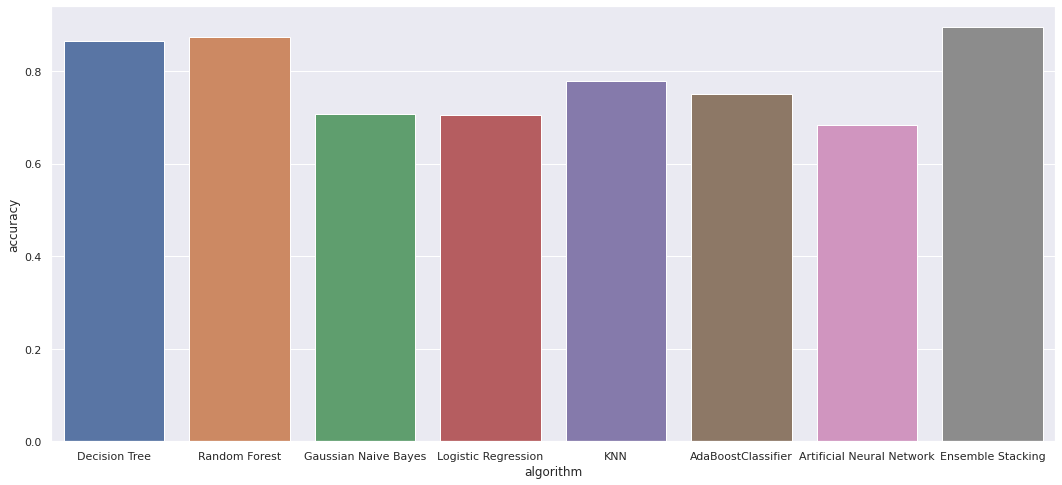

In [127]:
sns.set(rc={'figure.figsize':(18,8)})
plt.xlabel("algorithm")
plt.ylabel("accuracy")
sns.barplot(list(accTest.keys()),list(accTest.values()))

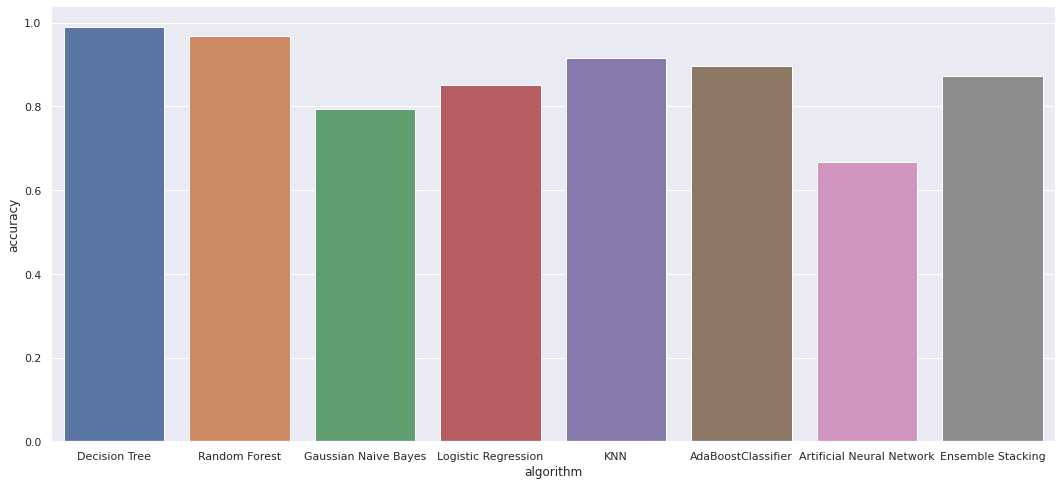

In [126]:
sns.set(rc={'figure.figsize':(18,8)})
plt.xlabel("algorithm")
plt.ylabel("accuracy")
sns.barplot(list(accTrain.keys()),list(accTrain.values()))

# Result analysis and Conclusion 

We started using simple machine learning algorithms on the dataset to check how well they performed before going for ensemble methods. 
### The following algorithms were used:
1. Logistic Regression: It is a statistical model that uses a logistic function to model a binary dependent variable.
2. MultinomialNB: This algorithm implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice).
3. KNN Classifier: In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
4. Decision Tree Classifier: A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.
5. Neural network: Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

###  The next two algorithms used are ensemble methods:
1. Random Forest Classifier: random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
2. AdaBoost Classifier : It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.
3. Ensemble Stacking of all algorithms in a neural network to form a polling method



After using various algorithms to analyze the performance of these algorithm on the dataset we can conclude that ensemble methods are clearly better than simple machine learning algorithms.

Ensemble methods like Random Forest Classifier and AdaBoost Classifier have clearly better accuracies i.e. 86.1% and 85.6% respectively. These algorithms also have better recall and precision.
For Random Forest Classifier:
    
    • Precision: 81.2%
    • Recall: 97.2%
    
For AdaBoost Classifier:

    • Precision: 80.8%
    • Recall:96.9%
    
Recall is number of true positives divided by the number of true positives plus the number of false negatives.
Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.

As we can see the precision of both the algorithms are above 95% which clearly shows that the number of false positives is minimal.

When compared to non-ensemble simple machine learning algorithms their accuracies are relatively low:

    • Logistic Regression: 70.2%
    • MultinomialNB: 75.2%
    • KNN Classifier: 78.2%
    • Decision Tree Classifier: 85.8%


we also notice that though training accuracy of non-ensemble method were high it declined with testing dataset which brought us to a conclusion Non ensemble methods lead to overfitting of the data. thus we decided to use ensemble methods to optimize the exisiting results

Hence we conclude from this comparative study that ensemble methods (Random Forest AdaBoost Classifier and Ensemble Stacking using polling) on this dataset and generally more precise and accurate when compared to normal machine learning algorithms.